# Regresión Lineal

#### Inteligencia Artificial 2025

#### Mirka Galilea Dennis Vargas

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16,8)
plt.style.use('ggplot')

#### Desarrolla la función de costo tal como se pide abajo

In [30]:
import numpy as np

def mse(x, y, w, b):
    """
    Calcula el costo de acuerdo al criterio de MSE (mean square error) asumiendo un conjunto de datos
    x, con una salida y, y una hipótesis lineal parametrizada por omega.
    
    Parámetros
    ----------
    x: Un ndarray de dimension (M, n)
    y: Un ndarray de dimensión (M, )
    w: Un ndarray de dimensión (n, )
    b: Un flotante
    
    Devuelve
    --------
    Un flotante con el costo (MSE)
    """
    M, n = x.shape
    loss = 0

    # Implementación con ciclos
    J = 0
    for i in range(M):
        y_pred = np.dot(x[i], w) + b  # Predicción
        J += (y_pred - y[i]) ** 2  # Error cuadrático
        
    loss = J / M  # Promedio de los errores cuadráticos
    
    # Implementación con NumPy (más eficiente)
    # loss = np.mean((np.dot(x, w) + b - y) ** 2)
    
    return loss


#### Desarrolla la función con descenso de gradiente

In [32]:
import numpy as np

def grad_costo(x, y, w, b):
    """
    Calcula el gradiente respecto a w y b de los datos existentes
    
    Parámetros
    ----------
    x: ndarray de dimensión [M, n] con la matriz de diseño
    y: ndarray de dimensión [M,] con los valores de salida
    w: ndarray de dimensión [n, ] con los pesos 
    b: flotante con el sesgo 
    
    Devuelve
    --------
    dw, db: donde dw es un vector de dimensión de w con el gradiente
            de la función de costo respecto a w, y db es la derivada de la
            función de costo respecto a b
    """
    M, n = x.shape  # Número de muestras y características
    
    error = (x @ w + b) - y  # Error entre predicción y valores reales
    
    dw = (2 / M) * (x.T @ error)  # Gradiente respecto a w
    db = (2 / M) * np.sum(error)  # Gradiente respecto a b

    return dw, db


In [36]:
import numpy as np

def descenso_gradiente_lotes(x, y, w_0, b_0, eta, max_epoch):
    """
    Descenso de gradiente durante max_epoch iteraciones para regresión lineal.
    
    Parámetros
    -----------
    x: ndarray de dimensión [M, n] con los datos de entrada
    y: ndarray de dimensión [M,] con los datos de salida
    w_0: ndarray de dimensión [n, ] con los pesos iniciales
    b_0: flotante con el sesgo inicial
    eta: flotante con tamaño de paso o tasa de aprendizaje.
    max_epoch: número de iteraciones (entero)
    
    Devuelve
    --------
    w, b, mse_iter: donde w y b tienen las dimensiones de w_0 y b_0 con los parámetros 
                    aprendidos, mientras que mse_iter es un ndarray de dimensión 
                    [max_epoch, 1] con el costo en cada iteración.
    """
    w, b = w_0.copy(), b_0  # Inicializamos w y b con los valores dados
    mse_iter = np.zeros(max_epoch)  # Para almacenar la evolución del costo

    for iter in range(max_epoch):
        dw, db = grad_costo(x, y, w, b)  # Calculamos gradientes

        # Actualizamos los parámetros con la regla de descenso de gradiente
        w -= eta * dw
        b -= eta * db    

        # Guardamos el costo en la iteración actual
        mse_iter[iter] = mse(x, y, w, b)

    return w, b, mse_iter


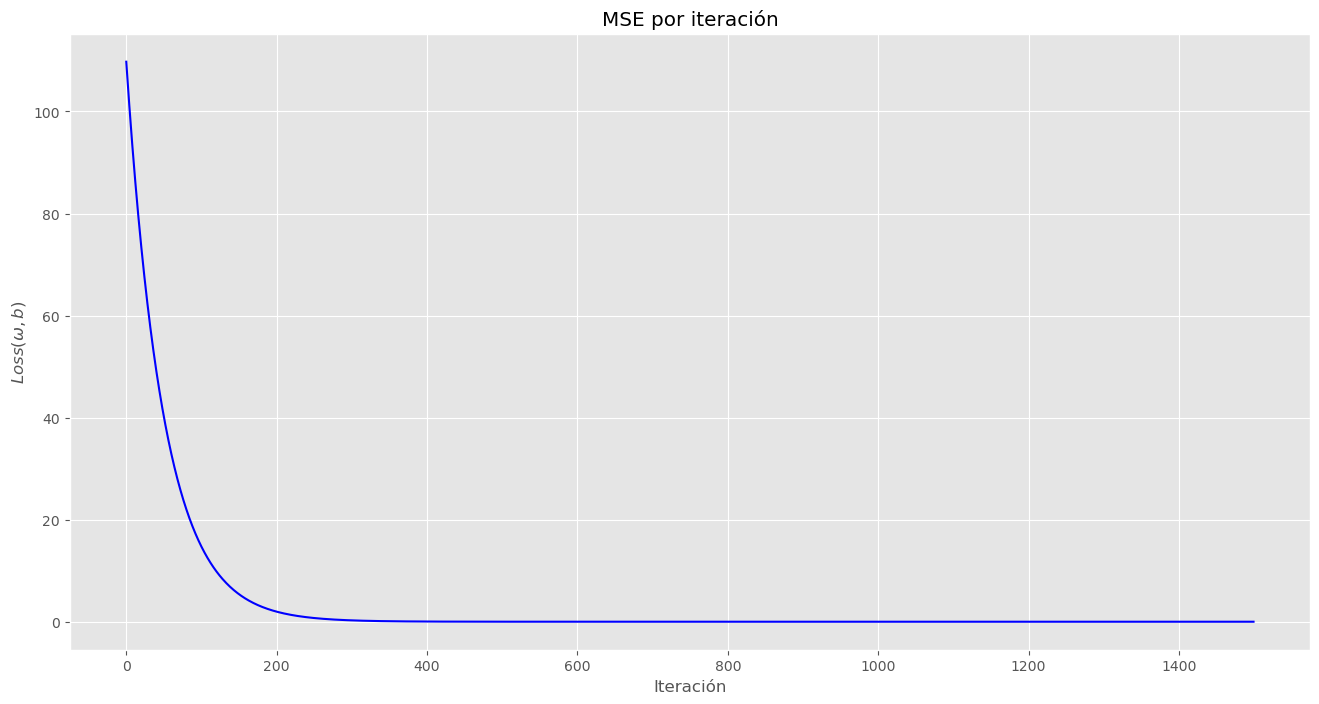

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Generar datos de prueba simulando precios de casas (Ejemplo)
np.random.seed(42)
M = 100  # Número de muestras
n = 1  # Número de características

x = 2 + 22 * np.random.rand(M, n)  # Valores de x en el rango [2, 24]
y = 1 + 1.01 * x[:, 0] + np.random.randn(M) * 0.5  # Relación lineal con ruido

# Normalizar los datos para mejorar la convergencia del descenso de gradiente
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Inicializar parámetros
w_0 = np.zeros((n,))
b_0 = 0.0
alpha = 0.01  # Tasa de aprendizaje
iteraciones = 1500  # Número de iteraciones

# Función de costo (Mean Squared Error)
def mse(x, y, w, b):
    M = x.shape[0]
    y_pred = x @ w + b
    return np.sum((y_pred - y) ** 2) / (2 * M)

# Gradiente de la función de costo
def grad_costo(x, y, w, b):
    M = x.shape[0]
    error = (x @ w + b) - y
    dw = (x.T @ error) / M
    db = np.sum(error) / M
    return dw, db

# Descenso de gradiente
def descenso_gradiente_lotes(x, y, w_0, b_0, eta, max_epoch):
    w, b = w_0.copy(), b_0
    mse_iter = np.zeros(max_epoch)

    for i in range(max_epoch):
        dw, db = grad_costo(x, y, w, b)
        w -= eta * dw
        b -= eta * db
        mse_iter[i] = mse(x, y, w, b)

    return w, b, mse_iter

# Entrenar el modelo
w, b, mse_historial = descenso_gradiente_lotes(x_scaled, y, w_0, b_0, alpha, iteraciones)

# Graficar el costo por iteración
plt.plot(mse_historial, 'b')
plt.title(u'MSE por iteración')
plt.xlabel(u'Iteración')
plt.ylabel(r'$Loss(\omega, b)$')
plt.show()





#### Completa los paso para realizar la estimación

In [64]:
import numpy as np

x_estimar = np.array([[4], [24]])

# Normalizar x_estimar antes de la predicción
x_estimar_scaled = scaler.transform(x_estimar)

# Predicción
y_estimado = x_estimar_scaled @ w + b

# Desnormalizar la predicción para revertir la escala
y_estimado_desnormalizado = y_estimado * np.std(y) + np.mean(y)

print("Los valores estimados son: {}".format(y_estimado_desnormalizado))

Los valores estimados son: [ 46.91571998 177.34715965]
